In [1]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import sys

sys.path.append("Bibliography")
import Bibliography as bg


# Entering data

## To add - nitrogen type/ oxygen type

In [2]:
bib = bg.Bibliography()
bib.tab

## Further notes - checklists
### Quantities of materials used: 
- Zhao 2015 freestanding

### EDX
- TEM: Zhao 2015 freestanding

### Refers to Ji 2009 for 155 deg C
- Li 2014: sulfur-nitrogen

# Results testing

- Need to be able to compare with and without doping from the same article to show the difference

In [3]:
import pandas as pd

In [4]:
glob.glob(os.path.join("fig2fig_data_2", "*.csv"))

['fig2fig_data_2\\jia2021_aerogel.csv',
 'fig2fig_data_2\\li2014_multiwalled_CNTs.csv',
 'fig2fig_data_2\\song2019_dandelion.csv',
 'fig2fig_data_2\\xie2017_multiporous.csv',
 'fig2fig_data_2\\zhao2015_freestanding.csv']

In [5]:
df = pd.concat([pd.read_csv(filename, index_col=0) for filename in glob.glob(os.path.join("fig2fig_data_2", "*.csv"))],
               ignore_index=True)

In [7]:
names, counts = np.unique(df["Carbon type"], return_counts=True)

<IPython.core.display.Javascript object>


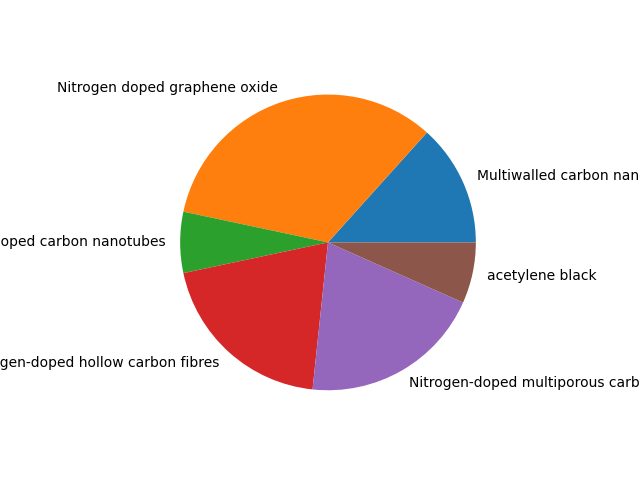

In [8]:
f, ax = plt.subplots()
ax.pie(counts, labels=names);

In [ ]:
df["Sulfur loading method"]

In [ ]:
df[["Nitrogen content", "Nitrogen units"]]

In [ ]:
df[["Oxygen content", "Oxygen units"]]

## Characterisation methods

In [ ]:
df["Optional label"]

In [ ]:
characterisation_labels = ["SEM", "XPS", "Raman", "EDX", "TEM", "FTIR"]
characterisation_columns = [item for sublist in [[column for column in df.columns if label in column] for label in characterisation_labels] for item in sublist]
df[characterisation_columns]

In [ ]:
char_dict = dict([(label, 
       df[[column for column in characterisation_columns if label in column]].to_numpy().any(axis=1))
      for label in characterisation_labels])

In [ ]:
char_counts = dict([(keys, np.count_nonzero(values[values==True]))
                    for keys, values in char_dict.items()])

In [ ]:
char_counts